In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Loading of original datatset
# aus_real_estate = pd.read_csv(r"C:\Users\melvj\Downloads\aus_real_estate.csv")

# Loading of cleaned datatset
aus_real_estate = pd.read_excel(r"/Users/andrewtlim/Downloads/VSP_GBA_Cleaned.xlsx") 

# Initial Cleaning - Dropping of variables 'State' & 'Garage'
aus_real_estate = aus_real_estate.drohttp://localhost:8888/notebooks/UBC%20VSP/VSP_GBA.ipynb#p(["State","Garage"], axis = 1)

# Dropping of 'NA' values if there are any
aus_real_estate = aus_real_estate.dropna()

# Selecting only integer columns
int_columns = aus_real_estate.select_dtypes(include=['int64', 'float64'])
#print(int_columns)

# Checking for negative values
negative_values = aus_real_estate[(int_columns < 0).any(axis=1)]

# Empty dataframe printed, hence, there are no negative values present 
print(negative_values)

aus_real_estate.head()

Empty DataFrame
Columns: [Price, Bedrooms, Bathrooms, SqFt, City, Adelaide, Brisbane, Melbourne, Perth, Sydney, Year_Built, Type, Townhouse, House, Apartment, Lot_Area]
Index: []


,Price,Bedrooms,Bathrooms,SqFt,City,Adelaide,Brisbane,Melbourne,Perth,Sydney,Year_Built,Type,Townhouse,House,Apartment,Lot_Area
0,982112,4,1,1561,Adelaide,1,0,0,0,0,2021,Townhouse,1,0,0,1357
1,571388,3,2,3735,Melbourne,0,0,1,0,0,1999,House,0,1,0,8397
2,866821,5,1,2032,Sydney,0,0,0,0,1,1976,Townhouse,1,0,0,3478
3,1230977,4,3,3861,Brisbane,0,1,0,0,0,1978,House,0,1,0,7619
4,241787,4,2,3150,Perth,0,0,0,1,0,1992,Apartment,0,0,1,8324


In [3]:
# Define independent and target variable
X = aus_real_estate.drop(['Price', 'City', 'Type', 'Year_Built'], axis=1)

y = aus_real_estate['Price']
#y = np.log(aus_real_estate['Price'])
#aus_real_estate["log_price"] = y
#y.head()

In [4]:

# Loading of cleaned datatset
aus_real_estate = pd.read_excel(r"/Users/andrewtlim/Downloads/VSP_GBA_Cleaned.xlsx") 

# Initial Cleaning - Dropping of variables that were transformed. Reverting to original dataset.
aus_real_estate = aus_real_estate.drop(["State","Garage","Adelaide","Brisbane","Melbourne","Perth","Sydney","Townhouse","House","Apartment"], axis = 1)

# Dropping of 'NA' values if there are any
aus_real_estate = aus_real_estate.dropna()

# Selecting only integer columns
int_columns = aus_real_estate.select_dtypes(include=['int64', 'float64'])
#print(int_columns)

# Checking for negative values
negative_values = aus_real_estate[(int_columns < 0).any(axis=1)]

# Empty dataframe printed, hence, there are no negative values present 
print(negative_values)

aus_real_estate.head()

Empty DataFrame
Columns: [Price, Bedrooms, Bathrooms, SqFt, City, Year_Built, Type, Lot_Area]
Index: []


,Price,Bedrooms,Bathrooms,SqFt,City,Year_Built,Type,Lot_Area
0,982112,4,1,1561,Adelaide,2021,Townhouse,1357
1,571388,3,2,3735,Melbourne,1999,House,8397
2,866821,5,1,2032,Sydney,1976,Townhouse,3478
3,1230977,4,3,3861,Brisbane,1978,House,7619
4,241787,4,2,3150,Perth,1992,Apartment,8324


In [5]:
# New df for longitude, latitude and land size (square KM)
geo_data = {
    'City': ['Adelaide', 'Melbourne', 'Sydney', 'Brisbane', 'Perth'],
    'Latitude': [-34.9285, -37.8136, -33.8688, -27.4698, -31.9505],
    'Longitude': [138.6007, 144.9631, 151.2093, 153.0251, 115.8605],
    'Land_Size': [3260, 9992, 12145, 15826, 6418]  # Example land size data in square km
}

geo_df = pd.DataFrame(geo_data)

# Merging original df with geo df
aus_geo_estate = pd.merge(aus_real_estate, geo_df, on='City')

aus_geo_estate


,Price,Bedrooms,Bathrooms,SqFt,City,Year_Built,Type,Lot_Area,Latitude,Longitude,Land_Size
0,982112,4,1,1561,Adelaide,2021,Townhouse,1357,-34.9285,138.6007,3260
1,550777,4,1,829,Adelaide,2022,Townhouse,2752,-34.9285,138.6007,3260
2,977320,1,1,2218,Adelaide,1972,Apartment,8425,-34.9285,138.6007,3260
3,1813301,3,2,1359,Adelaide,1991,House,9376,-34.9285,138.6007,3260
4,1731191,5,1,1233,Adelaide,1964,Townhouse,7669,-34.9285,138.6007,3260
...,...,...,...,...,...,...,...,...,...,...,...
4995,1200106,4,3,3827,Perth,1962,House,4916,-31.9505,115.8605,6418
4996,342972,4,2,3578,Perth,1975,House,3775,-31.9505,115.8605,6418
4997,1345517,4,3,2498,Perth,1951,Apartment,9426,-31.9505,115.8605,6418
4998,1992719,1,1,2971,Perth,2011,Apartment,4548,-31.9505,115.8605,6418


In [6]:


# Convert the city aus_geo_estate df to a GeoDataFrame type
geometry = gpd.points_from_xy(aus_geo_estate.Longitude, aus_geo_estate.Latitude)
aus_city_geo_df = gpd.GeoDataFrame(aus_geo_estate, geometry=geometry)

# Loading of Aus Shapefile from Australian Bureau of Statistics
australia = gpd.read_file('/Users/andrewtlim/Downloads/AUS_2021_AUST_SHP_GDA2020')

# Checking of coordinate reference system (CRS)
australia = australia.to_crs(epsg=4326)
aus_city_geo_df = aus_city_geo_df.set_crs(epsg=4326)

aus_city_geo_df

,Price,Bedrooms,Bathrooms,SqFt,City,Year_Built,Type,Lot_Area,Latitude,Longitude,Land_Size,geometry
0,982112,4,1,1561,Adelaide,2021,Townhouse,1357,-34.9285,138.6007,3260,POINT (138.6007 -34.9285)
1,550777,4,1,829,Adelaide,2022,Townhouse,2752,-34.9285,138.6007,3260,POINT (138.6007 -34.9285)
2,977320,1,1,2218,Adelaide,1972,Apartment,8425,-34.9285,138.6007,3260,POINT (138.6007 -34.9285)
3,1813301,3,2,1359,Adelaide,1991,House,9376,-34.9285,138.6007,3260,POINT (138.6007 -34.9285)
4,1731191,5,1,1233,Adelaide,1964,Townhouse,7669,-34.9285,138.6007,3260,POINT (138.6007 -34.9285)
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1200106,4,3,3827,Perth,1962,House,4916,-31.9505,115.8605,6418,POINT (115.8605 -31.9505)
4996,342972,4,2,3578,Perth,1975,House,3775,-31.9505,115.8605,6418,POINT (115.8605 -31.9505)
4997,1345517,4,3,2498,Perth,1951,Apartment,9426,-31.9505,115.8605,6418,POINT (115.8605 -31.9505)
4998,1992719,1,1,2971,Perth,2011,Apartment,4548,-31.9505,115.8605,6418,POINT (115.8605 -31.9505)


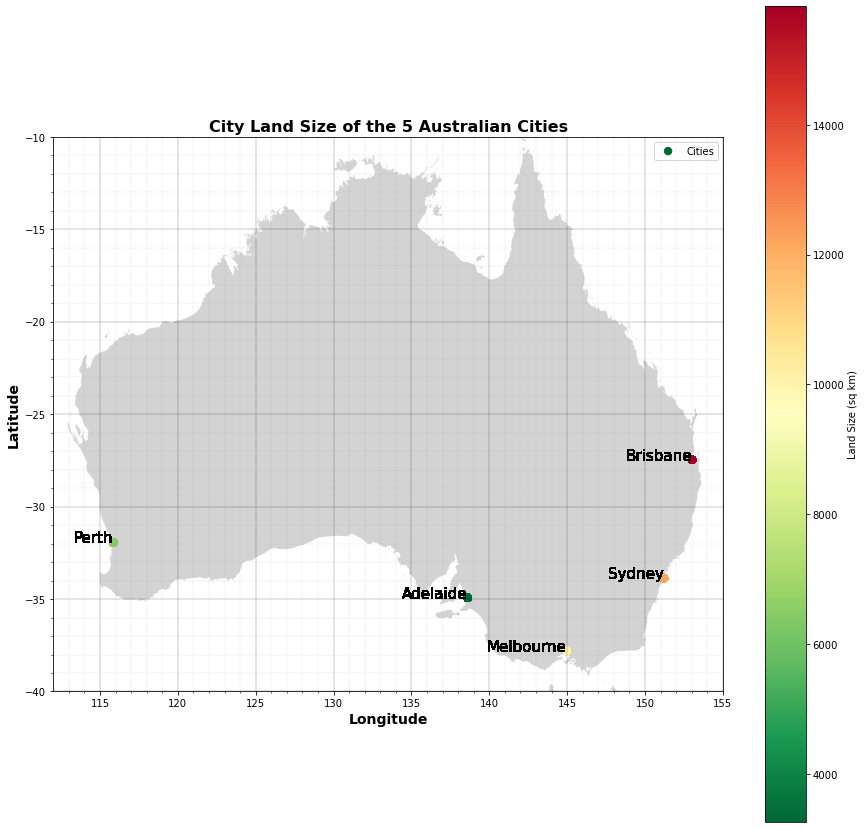

In [7]:
# Assigning colourmap with colours red, yellow and green but in a reverse order
cmap = plt.get_cmap('RdYlGn_r')  # Red to have the highest value

# Normalise the land size values' min and max to map to the colormap
norm = plt.Normalize(aus_city_geo_df.Land_Size.min(), aus_city_geo_df.Land_Size.max())
colors = cmap(norm(aus_city_geo_df.Land_Size))

# Plot the Australian map
fig, ax = plt.subplots(figsize=(15, 15))
australia.plot(ax=ax, color='lightgrey')

# Plot the city locations with colour coding based on land size
aus_city_geo_df.plot(ax=ax, color=colors, markersize=55, label='Cities')

# Adding of colour bar to show spread for gradient
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Land Size (sq km)')

# Adding labels for each city with for loop and zip
for x, y, label in zip(aus_city_geo_df.geometry.x, aus_city_geo_df.geometry.y, aus_city_geo_df.City):
    ax.text(x, y, label, fontsize=15, ha='right')

# Setting up the grid lines in the plot
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.minorticks_on()  # Turn on the minor ticks for more grid lines
ax.grid(which='major', linestyle='-', linewidth='0.2', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.2', color='gray')

# Setting the zoom scale for the map in the grid
ax.set_xlim(112,155)
ax.set_ylim(-40,-10)

# Adding of x and y labels
ax.set_xlabel('Longitude',fontsize=14, weight='bold')
ax.set_ylabel('Latitude',fontsize=14, weight='bold')

plt.legend()
plt.title('City Land Size of the 5 Australian Cities', fontsize=16, weight='bold')
plt.show()